# Classifier for Loan Deafult IBM-Coursera (Peer_graded assessment)

This is a peer graded assessment test/examination of IBM-COursera certification  Machine Learning With Pyton.
We will be doing classification problem on Loan_train dataset to predict the defaulting and genuine customers.

Logistic regression, Support Vector Machine, K-Nearest Neighbour and Decision Tree models are built , applied on the data set and evaluated using Jaccard index ,F1-score ,LogLoass as mentioned in the test question. 

In [1]:
loan_train_csv= "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv"
loan_test_csv = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

In [3]:
#reading loan_train_csv

df_train= pd.read_csv(loan_train_csv,  parse_dates=True)
df_test = pd.read_csv(loan_test_csv,  parse_dates=True)

To reducing number of  preprocessing operations on train and test set we will combine both dataframes. After preprocessing whole data framewe will split them again.

In [4]:
df_train = df_train.append(df_test)

In [5]:
#dispaly top few records
df_train.shape

(400, 10)

Field	Description

Loan_status	Whether a loan is paid off on in collection

Principal	Basic principal loan amount at the

Terms	Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule

Effective_date	When the loan got originated and took effects

Due_date	Since it’s one-time payoff schedule, each loan has one single due date

Age	Age of applicant

Education	Education of applicant

Gender	The gender of applicant

In [6]:
#rename columns
columns = df_train.columns
columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [7]:
#rename columns 
df_train.rename(columns = { columns[0]:"one" , columns[1]:"two"}, inplace = True)
df_train.columns

Index(['one', 'two', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [8]:
#check data types
df_train.dtypes

one                int64
two                int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [9]:
#converting string dates  to datetime 
df_train['effective_date'] = pd.to_datetime(df_train['effective_date'])
df_train['due_date'] = pd.to_datetime(df_train['due_date'])
df_train.dtypes

one                        int64
two                        int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

In [10]:
#check null values
df_train.isna().sum()

one               0
two               0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

Hence no missing values.

In [11]:
df_train.head(10)

,one,two,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male


In [12]:
#checking types of unique values 
df_train.education.unique() # 4 unique
df_train.loan_status.unique() #two uniques

array(['PAIDOFF', 'COLLECTION'], dtype=object)

In [13]:
#convrt gender colum to numeric values -- 0- male, 1- female
from sklearn.preprocessing import LabelEncoder
genderEncoder= LabelEncoder()
df_train.Gender = genderEncoder.fit_transform(df_train.Gender)
df_train.head()

,one,two,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1


In [14]:
edu_dummy= pd.get_dummies(df_train.education)
edu_dummy
df_train.drop(axis=1, columns= "education", inplace= True)
df_train = pd.concat( [df_train,edu_dummy ], axis=1 )


In [15]:
#convert loan_status  to numeric values 1- paid, 0- default
loan_status_encoder =LabelEncoder()
df_train.loan_status = loan_status_encoder.fit_transform(df_train.loan_status)
df_train.head()

,one,two,loan_status,Principal,terms,effective_date,due_date,age,Gender,Bechalor,High School or Below,Master or Above,college
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,1,0,1,0,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,0,1,0,0,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,1,0,0,0,1
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,0,0,0,0,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,1,0,0,0,1


In [16]:
# create method to add date parts . This method is a part of fast ai library
from pandas.api.types import *
import re
def add_datepart(df, fldname, drop=True, time=False, errors="raise"):	
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.
    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.
    
    """
    
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

def is_date(x): return np.issubdtype(x.dtype, np.datetime64)



In [17]:
#separating target varible and independent avriables
X = df_train.loc[:, df_train.columns != 'loan_status']
Y = df_train.loan_status

Converting date into dateparts like quarter, day of year,day of week etc.

In [18]:
add_datepart(X, fldname= 'effective_date')
add_datepart(X, fldname= 'due_date')
X

,one,two,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college,...,due_Day,due_Dayofweek,due_Dayofyear,due_Is_month_end,due_Is_month_start,due_Is_quarter_end,due_Is_quarter_start,due_Is_year_end,due_Is_year_start,due_Elapsed
0,0,0,1000,30,45,1,0,1,0,0,...,7,4,281,False,False,False,False,False,False,1475798400
1,2,2,1000,30,33,0,1,0,0,0,...,7,4,281,False,False,False,False,False,False,1475798400
2,3,3,1000,15,27,1,0,0,0,1,...,22,3,266,False,False,False,False,False,False,1474502400
3,4,4,1000,30,28,0,0,0,0,1,...,8,5,282,False,False,False,False,False,False,1475884800
4,6,6,1000,30,29,1,0,0,0,1,...,8,5,282,False,False,False,False,False,False,1475884800
5,7,7,1000,30,36,1,0,0,0,1,...,8,5,282,False,False,False,False,False,False,1475884800
6,8,8,1000,30,28,1,0,0,0,1,...,8,5,282,False,False,False,False,False,False,1475884800
7,9,9,800,15,26,1,0,0,0,1,...,24,5,268,False,False,False,False,False,False,1474675200
8,10,10,300,7,29,1,0,0,0,1,...,16,4,260,False,False,False,False,False,False,1473984000
9,11,11,1000,15,39,1,0,1,0,0,...,9,6,283,False,False,False,False,False,False,1475971200


Finally, we have all values numeric in the dataframe. It is ready to normalize and apply to model. 

In [19]:
X.dtypes

one                           int64
two                           int64
Principal                     int64
terms                         int64
age                           int64
Gender                        int64
Bechalor                      uint8
High School or Below          uint8
Master or Above               uint8
college                       uint8
effective_Year                int64
effective_Month               int64
effective_Week                int64
effective_Day                 int64
effective_Dayofweek           int64
effective_Dayofyear           int64
effective_Is_month_end         bool
effective_Is_month_start       bool
effective_Is_quarter_end       bool
effective_Is_quarter_start     bool
effective_Is_year_end          bool
effective_Is_year_start        bool
effective_Elapsed             int64
due_Year                      int64
due_Month                     int64
due_Week                      int64
due_Day                       int64
due_Dayofweek               

# Scalling data


In [20]:
from sklearn.preprocessing import StandardScaler
X_normalized = StandardScaler().fit(X).transform(X)
X_normalized[0:3]

array([[-1.72772608, -1.72772608,  0.50130175,  0.92089421,  2.31334964,
         0.43236977, -0.38655567,  1.15133896, -0.10050378, -0.86855395,
         0.        ,  0.        , -0.80379757, -2.99072091, -0.26462433,
        -2.99072091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -2.99072091,  0.        ,  0.72049117,
         0.05549036, -1.33593342,  0.61329721,  0.20072177,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.20072177],
       [-1.71040552, -1.71040552,  0.50130175,  0.92089421,  0.32194392,
        -2.31283513,  2.5869495 , -0.86855395, -0.10050378, -0.86855395,
         0.        ,  0.        , -0.80379757, -2.99072091, -0.26462433,
        -2.99072091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -2.99072091,  0.        ,  0.72049117,
         0.05549036, -1.33593342,  0.61329721,  0.20072177,  0.        ,
         0.        ,  0.     

# Feature Selection PCA

In [21]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=4)
X = pca.fit_transform(X)


# Train Test Split

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split (X, Y, test_size= 0.2, random_state= 0)

1    300
0    100
Name: loan_status, dtype: int64


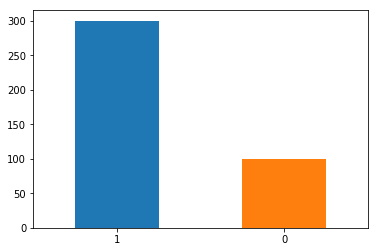

1    59
0    21
Name: loan_status, dtype: int64


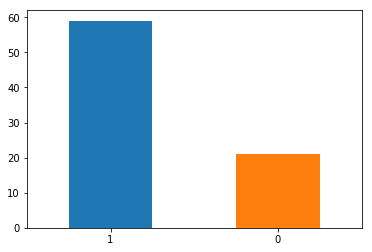

In [202]:
#class counts in target variable
print(df_train.loan_status.value_counts())

df_train.loan_status.value_counts().plot.bar(rot=0)
plot.show()

print(Y_valid.value_counts())
Y_valid.value_counts().plot.bar(rot=0)
plot.show()

1-Paid off, 0- collection .In testing records we have 59 paid loans and 21 defaulted cases.

# Building model using Logistic Regression



In [23]:
#Logistic model
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)

#
y_pred_LR =logreg.predict(X_valid)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_valid, y_pred_LR))

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_valid, y_pred_LR)



0.975


array([[21,  0],
       [ 2, 57]])

We can see the Logistic Regression fails to classify default records. It has classified 21/21 default cases but fails to predict 2 genuin cases.

# Building model using Decision Tree

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT.fit(X_train,Y_train)
#DT

y_pred_DT=DT.predict(X_valid)
print(accuracy_score(Y_valid, y_pred_DT))


from sklearn.metrics import confusion_matrix
confusion_matrix(Y_valid, y_pred_DT)



1.0


array([[21,  0],
       [ 0, 59]])

Both classes are predicted with 100percent accuracy. 21/21 defaulted and 59/59 genuine. Hence the best model.

# Building model using  K- Nearest Neighbour

Notice: Find the best k to build the model with the best accuracy.

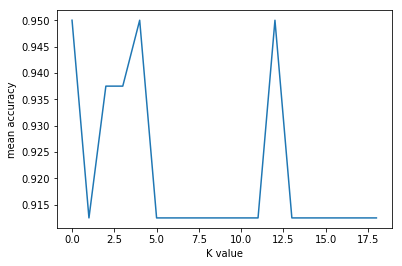

array([ 0.95  ,  0.9125,  0.9375,  0.9375,  0.95  ,  0.9125,  0.9125,
        0.9125,  0.9125,  0.9125,  0.9125,  0.9125,  0.95  ,  0.9125,
        0.9125,  0.9125,  0.9125,  0.9125,  0.9125])

In [25]:
from sklearn.neighbors import KNeighborsClassifier

kmax=20
mean_accuracy=np.zeros(kmax-1)

for k in range(1,kmax):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
    ypred = knn.predict(X_valid)
    mean_accuracy[k-1]=np.mean(ypred==Y_valid);
    
    


plot.plot(np.arange(19),mean_accuracy)
plot.xlabel("K value")
plot.ylabel("mean accuracy")
plot.show()
mean_accuracy

Hence, we can observe the maximum accuracy is achieved at K=5 / 13. SO we will consider K=5 as the best K value.

In [26]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,Y_train)
y_pred_knn = knn.predict(X_valid)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_valid, y_pred_knn))

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_valid, y_pred_knn)


0.95


array([[17,  4],
       [ 0, 59]])

# Building model using Support Vector Machine

In [34]:
from sklearn import svm
svm = svm.SVC(probability=True)
svm.fit(X_train, Y_train)

y_pred_svm = svm.predict(X_valid)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_valid, y_pred_svm))

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_valid, y_pred_svm)






0.8


array([[ 5, 16],
       [ 0, 59]])

We can see SVM wrongly predicts 16 defaulted cases .

# Finding the best Model . Evaluation Using Jaccard Index, F1- Score and and Log Loss

In [35]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Jaccard Similarity

In [36]:
# Jaccard for LR 
jcLR = round(jaccard_similarity_score(Y_valid, y_pred_LR),2)
# Jaccard Decision Trees
jcDT = round(jaccard_similarity_score(Y_valid, y_pred_DT),2)
#Jaccard for KNN
jcKNN = round(jaccard_similarity_score(Y_valid, y_pred_knn),2)
# Jaccard for SVM
jcSVM = round(jaccard_similarity_score(Y_valid, y_pred_svm),2)

list_jaccard_similarity  = [jcLR, jcDT, jcKNN, jcSVM]
list_jaccard_similarity

[0.97999999999999998, 1.0, 0.94999999999999996, 0.80000000000000004]

# F1_score

In [37]:

fLR = round(f1_score(Y_valid, y_pred_LR, average='weighted'), 2)
fDT = round(f1_score(Y_valid, y_pred_DT, average='weighted'), 2)
fKNN = round(f1_score(Y_valid, y_pred_knn, average='weighted'), 2)
fSVM = round(f1_score(Y_valid, y_pred_svm, average='weighted'),2 )

list_f1_score = [fLR, fDT, fKNN, fSVM]
list_f1_score

[0.97999999999999998, 1.0, 0.94999999999999996, 0.75]

# Log Loss

In [38]:
lgloss_LR =log_loss(Y_valid, logreg.predict_proba(X_valid))
lgloss_DT = round(log_loss(Y_valid, DT.predict_proba(X_valid)), 2)
lgloss_KNN =round(log_loss(Y_valid, knn.predict_proba(X_valid)), 2)
lgloss_SVM =round(log_loss(Y_valid, svm.predict_proba(X_valid,)), 2)


list_log_loss = [lgloss_LR, lgloss_DT, lgloss_KNN, lgloss_SVM]
list_log_loss

[0.059956328701964469, 0.0, 0.12, 0.33000000000000002]

# Final Report on Evaluation

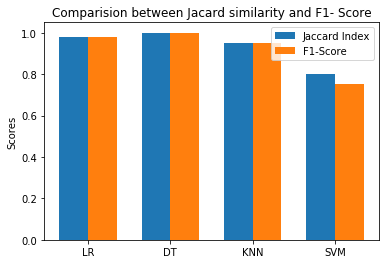

In [39]:
ind = np.arange(4) 
width = 0.35       
plot.bar(ind, list_jaccard_similarity, width, label='Jaccard Index')
plot.bar(ind + width,  list_f1_score, width,
    label='F1-Score')

plot.ylabel('Scores')
plot.title('Comparision between Jacard similarity and F1- Score')

plot.xticks(ind + width / 2, ('LR', 'DT', 'KNN', 'SVM'))
plot.legend(loc='best')
plot.show()

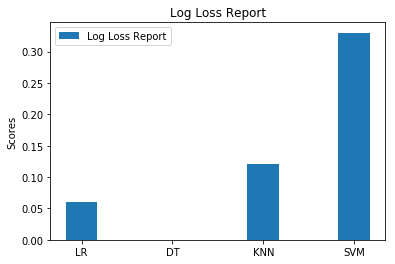

In [40]:
width = 0.35       
plot.bar(ind, list_log_loss, width, label='Log Loss Report')

plot.ylabel('Scores')
plot.title('Log Loss Report')

plot.xticks(ind , ('LR', 'DT', 'KNN', 'SVM'))
plot.legend(loc='best')
plot.show()

### The lowest log loss, highest jaccard and F1-score in DT. LR stands at second rank. Highest log loss and lowest jaccard similary,f1-score in SVM.  Hence, decision Tree is thebest model for the given problem. AFter that LR is the second best.

# Precision- Recall Curve

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

In [41]:
#method to plot - precision- recall curve for model evaluation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
def plot_prec_recall_curv(ytrue, ypred, title):
    #for a good model  precision and recall both should be high. 
    precision, recall, thresholds = precision_recall_curve(ytrue, ypred)
    auc1 = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(ytrue, ypred)
    print(' auc=%.3f ap=%.3f' % ( auc1, ap))
    # plot the precision-recall curve for the model
    plot.plot(recall, precision, marker='.')
    # show the plot
    plot.xlabel("recall")
    plot.ylabel("precision")
    plot.ylim([0.0, 1.05])
    plot.xlim([0.0, 1.0])
    plot.title(title+" PRECISION-RECALL CURVE , AUC: "+ str(auc1) )
    plot.fill_between(recall, precision, alpha=0.2, color='b')
    plot.show()

 auc=0.996 ap=0.991


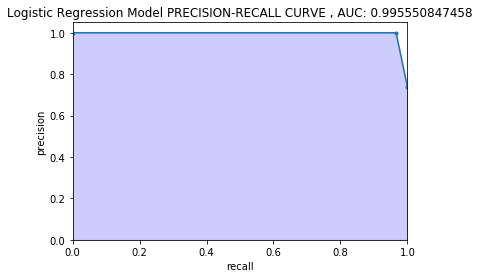

 auc=1.000 ap=1.000


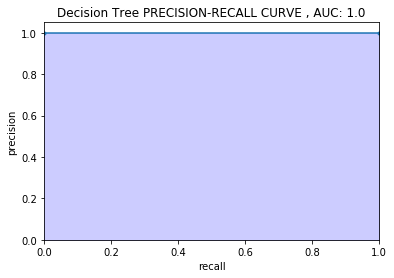

 auc=0.968 ap=0.937


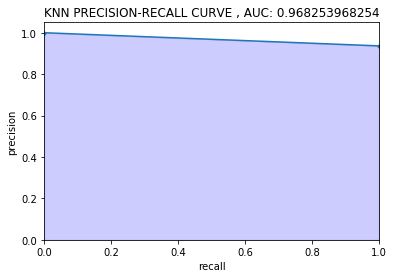

 auc=0.893 ap=0.787


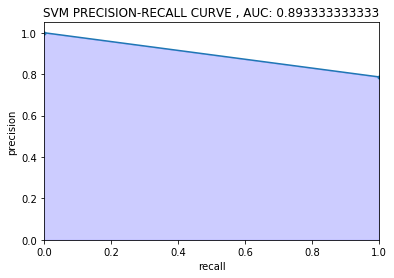

In [175]:
#plot recall precision curve
plot_prec_recall_curv(Y_valid, y_pred_LR, title="Logistic Regression Model")

plot_prec_recall_curv(Y_valid, y_pred_DT, title="Decision Tree")

plot_prec_recall_curv(Y_valid, y_pred_knn, title="KNN")

plot_prec_recall_curv(Y_valid, y_pred_svm ,title="SVM")



### We can observe from all curves that decision tree has the highest area under precision-recall curve. It gives the best performance. Second best model is the linear regression. 

# F1-score, Jaccard similary and log loss together:

In [42]:
# printing F1-score, Jaccard similary and log loss together:
df = pd.DataFrame(
    list(zip(
        ['LR','DT','KNN','SVM'],list_jaccard_similarity, list_f1_score, list_log_loss)),
    columns = ['Model', 'Jaccard','F1-Score','Log-Loss']
)

df = pd.DataFrame.from_dict(df)

print(df)

  Model  Jaccard  F1-Score  Log-Loss
0    LR     0.98      0.98  0.059956
1    DT     1.00      1.00  0.000000
2   KNN     0.95      0.95  0.120000
3   SVM     0.80      0.75  0.330000
